# Bounding box detection - Racoon data


## Data files
- images_racoon.rar: contain images of racoons
- train_labels.cv: contains coordinates for bounding box for every image

### Import the necessary libraries

In [1]:
# IMPORT LIBRARIES AND PACKAGES
import tensorflow as tf
import csv
import numpy as np
from PIL import Image

from keras import Model
from keras.applications.mobilenet import MobileNet, preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, Callback
from keras.layers import Conv2D, Reshape
from keras.utils import Sequence
from keras.backend import epsilon
import pandas as pd

Using TensorFlow backend.


In [75]:
import keras

In [76]:
keras.__version__

'2.2.4'

In [ ]:
import tens

### Change directory

In [2]:
pwd

'/Users/skirar/Saurabh/MISC/GL/Computer Vision With CNN'

In [3]:
df=pd.read_csv("train_labels.csv")

In [ ]:
df.head(4)

### Load the training data from train.csv file

In [4]:
# SETTINGS
ALPHA = 1.0 # Width hyper parameter for MobileNet (0.25, 0.5, 0.75, 1.0). Higher width means more accurate but slower
IMAGE_SIZE = 128 # MobileNet takes images of size 128*128*3 
EPOCHS = 10 # Number of epochs. I got decent performance with just 5.
BATCH_SIZE = 32 # Depends on your GPU or CPU RAM.

DATASET_FOLDER = "/Users/skirar/Saurabh/MISC/GL/Computer Vision With CNN/"
TRAIN_CSV = DATASET_FOLDER+"train_labels.csv"
##VALIDATION_CSV = DATASET_FOLDER+"validation.csv"

images_zip_path = DATASET_FOLDER + "images_racoon.rar"

from zipfile import ZipFile

In [5]:
with open(TRAIN_CSV,'r') as f:
    with open("updated_train_labels.csv",'w') as f1:
        next(f) # skip header line
        for line in f:
            f1.write(line)
            
TRAIN_CSV = "updated_train_labels.csv"

In [ ]:
import csv
with open(TRAIN_CSV, 'r') as csvfile:
    paths = []
    coords = np.zeros((sum(1 for line in csvfile), 4))
    reader = csv.reader(csvfile, delimiter=',')
    csvfile.seek(0)
    for col, row in enumerate(reader):
               
        for i, r in enumerate(row[1:8]): # Parse row with seven entities
            if (i!=2):
                row[i+1] = int(r)
                
            
              
        path, image_width,image_height,image_class, x0, y0, x1, y1 = row  
       ## path = "./" + path.split('/')[-2] + "/" + path.split('/')[-1]
        coords[col, 0] = x0 * IMAGE_SIZE / image_width # Normalize bounding box by image size
        coords[col, 1] = y0 * IMAGE_SIZE / image_height # Normalize bounding box by image size
        coords[col, 2] = (x1 - x0) * IMAGE_SIZE / image_width # Normalize bounding box by image size
        coords[col, 3] = (y1 - y0) * IMAGE_SIZE / image_height
        paths.append(path)

batch_images = np.zeros((len(paths), IMAGE_SIZE, IMAGE_SIZE, 3), dtype=np.float32)
for i, f in enumerate(paths):
    img = Image.open(f) # Read image
    img = img.resize((IMAGE_SIZE, IMAGE_SIZE)) # Resize image
    img = img.convert('RGB')
    batch_images[i] = preprocess_input(np.array(img, dtype=np.float32))

In [12]:
import os

In [13]:
pwd

'/Users/skirar/Saurabh/MISC/GL/Computer Vision With CNN'

In [20]:
import csv
with open(TRAIN_CSV, 'r') as csvfile:
    paths = []
    coords = np.zeros((sum(1 for line in csvfile), 4))
    reader = csv.reader(csvfile, delimiter=',')
    csvfile.seek(0)
    for col, row in enumerate(reader):
               
        for i, r in enumerate(row[1:8]): # Parse row with seven entities
            if (i!=2):
                row[i+1] = int(r)
                
            
              
        path, image_width,image_height,image_class, x0, y0, x1, y1 = row  
       # path = "./" + path.split('/')[-2] + "/" + path.split('/')[-1]
        coords[col, 0] = x0 * IMAGE_SIZE / image_width # Normalize bounding box by image size
        coords[col, 1] = y0 * IMAGE_SIZE / image_height # Normalize bounding box by image size
        coords[col, 2] = (x1 - x0) * IMAGE_SIZE / image_width # Normalize bounding box by image size
        coords[col, 3] = (y1 - y0) * IMAGE_SIZE / image_height
        paths.append(path)

batch_images = np.zeros((len(paths), IMAGE_SIZE, IMAGE_SIZE, 3), dtype=np.float32)
for i,f in enumerate(paths):
    print('i is ',i)
    print('F is ',f)
    
    img = Image.open(f) # Read image
    img = img.resize((IMAGE_SIZE, IMAGE_SIZE)) # Resize image
    img = img.convert('RGB')
    batch_images[i] = preprocess_input(np.array(img, dtype=np.float32))

i is  0
F is  raccoon-17.jpg
i is  1
F is  raccoon-11.jpg
i is  2
F is  raccoon-63.jpg
i is  3
F is  raccoon-63.jpg
i is  4
F is  raccoon-60.jpg
i is  5
F is  raccoon-69.jpg
i is  6
F is  raccoon-180.jpg
i is  7
F is  raccoon-200.jpg
i is  8
F is  raccoon-141.jpg
i is  9
F is  raccoon-19.jpg
i is  10
F is  raccoon-84.jpg
i is  11
F is  raccoon-124.jpg
i is  12
F is  raccoon-182.jpg
i is  13
F is  raccoon-111.jpg
i is  14
F is  raccoon-91.jpg
i is  15
F is  raccoon-79.jpg
i is  16
F is  raccoon-93.jpg
i is  17
F is  raccoon-20.jpg
i is  18
F is  raccoon-42.jpg
i is  19
F is  raccoon-139.jpg
i is  20
F is  raccoon-58.jpg
i is  21
F is  raccoon-71.jpg
i is  22
F is  raccoon-183.jpg
i is  23
F is  raccoon-1.jpg
i is  24
F is  raccoon-169.jpg
i is  25
F is  raccoon-82.jpg
i is  26
F is  raccoon-4.jpg
i is  27
F is  raccoon-101.jpg
i is  28
F is  raccoon-10.jpg
i is  29
F is  raccoon-166.jpg
i is  30
F is  raccoon-184.jpg
i is  31
F is  raccoon-38.jpg
i is  32
F is  raccoon-120.jpg
i is  33


### Print the shape of the train dataset

In [22]:
batch_images.shape

(173, 128, 128, 3)

### Declare a variable IMAGE_SIZE = 128 as we will be using MobileNet which will be taking Input shape as 128 * 128 

In [23]:
model = MobileNet(input_shape=(IMAGE_SIZE, IMAGE_SIZE, 3), include_top=False, alpha=ALPHA) # Load pre-trained mobilenet
# Do not include classification (top) layer

# to freeze layers, except the new top layer, of course, which will be added below
for layer in model.layers:
    layer.trainable = False

# Add new top layer which is a conv layer of the same size as the previous layer so that only 4 coords of BBox can be output
x = model.layers[-1].output
x = Conv2D(4, kernel_size=4, name="coords")(x)
# In the line above kernel size should be 3 for img size 96, 4 for img size 128, 5 for img size 160 etc.
x = Reshape((4,))(x) # These are the 4 predicted coordinates of one BBox

model = Model(inputs=model.input, outputs=x)

Instructions for updating:
Colocations handled automatically by placer.
17227776/17225924 [==============================] - 4s 0us/step


### With the help of csv.reader write a for loop which can load the train.csv file and store the path, width, height, x0,y0,x1,y1 in induvidual variables. <br>
1. Create a list variable known as 'path' which has all the path for all the training images
2. Create an array 'coords' which has the resized coordinates of the bounding box for the training images

<u>Note:</u> All the training images should be downsampled to 128 * 128 as it is the input shape of MobileNet (which we will be using for Object detection). Hence the corresponding coordinates of the bounding boxes should be changed to match the image dimension of 128 * 128 

In [ ]:
## Done above 

### Write a for loop which can load all the training images into a variable 'batch_images' using the paths from the 'paths' variable
<u>Note:</u> Convert the image to RGB scale as the MobileNet accepts 3 channels as inputs   

In [ ]:
## Done above 

### Import MobileNet and load MobileNet into a variable named 'model' which takes input shape of 128 * 128 * 3. Freeze all the layers. Add convolution and reshape layers at the end to ensure the output is 4 coordinates

In [ ]:
## Done above 

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 129, 129, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32)        128       
__________

### Define a custom loss function IoU which calculates Intersection Over Union

In [29]:
gt = coords
def loss(gt,pred):
    intersections = 0
    unions = 0
    diff_width = np.minimum(gt[:,0] + gt[:,2], pred[:,0] + pred[:,2]) - np.maximum(gt[:,0], pred[:,0])
    diff_height = np.minimum(gt[:,1] + gt[:,3], pred[:,1] + pred[:,3]) - np.maximum(gt[:,1], pred[:,1])
    intersection = diff_width * diff_height
    
    # Compute union
    area_gt = gt[:,2] * gt[:,3]
    area_pred = pred[:,2] * pred[:,3]
    union = area_gt + area_pred - intersection

#     Compute intersection and union over multiple boxes
    for j, _ in enumerate(union):
        if union[j] > 0 and intersection[j] > 0 and union[j] >= intersection[j]:
            intersections += intersection[j]
            unions += union[j]

    # Compute IOU. Use epsilon to prevent division by zero
    iou = np.round(intersections / (unions + epsilon()), 4)
    iou = iou.astype(np.float32)
    return iou

def IoU(y_true, y_pred):
    iou = tf.py_func(loss, [y_true, y_pred], tf.float32)
    return iou

### Write model.compile function & model.fit function with: <br>
1. Optimizer = Adam, Loss = 'mse' and metrics = IoU
2. Epochs = 30, batch_size = 32, verbose = 1

In [30]:
model.compile(optimizer='Adam', loss='mse', metrics=[IoU]) # Regression loss is MSE

#checkpoint = ModelCheckpoint("model-{val_iou:.2f}.h5", verbose=1, save_best_only=True,
#                              save_weights_only=True, mode="max", period=1) # Checkpoint best validation model
#stop = EarlyStopping(monitor="val_iou", patience=PATIENCE, mode="max") # Stop early, if the validation error deteriorates
#reduce_lr = ReduceLROnPlateau(monitor="val_iou", factor=0.2, patience=10, min_lr=1e-7, verbose=1, mode="max")
# Reduce learning rate if Validation IOU does not improve

model.fit(batch_images,gt,
            epochs=30,batch_size = 32,
            verbose=1)

Instructions for updating:
Use tf.cast instead.
Epoch 1/30
173/173 [==============================] - 4s 23ms/step - loss: 2872.0494 - IoU: 0.0773
Epoch 2/30
173/173 [==============================] - 3s 17ms/step - loss: 678.3027 - IoU: 0.4234
Epoch 3/30
173/173 [==============================] - 4s 22ms/step - loss: 641.1792 - IoU: 0.5390
Epoch 4/30
173/173 [==============================] - 3s 16ms/step - loss: 592.5202 - IoU: 0.5306
Epoch 5/30
173/173 [==============================] - 3s 16ms/step - loss: 353.5931 - IoU: 0.5845
Epoch 6/30
173/173 [==============================] - 3s 16ms/step - loss: 284.9393 - IoU: 0.5821
Epoch 7/30
173/173 [==============================] - 3s 16ms/step - loss: 256.2553 - IoU: 0.5902
Epoch 8/30
173/173 [==============================] - 3s 16ms/step - loss: 193.4903 - IoU: 0.6616
Epoch 9/30
173/173 [==============================] - 3s 16ms/step - loss: 172.4617 - IoU: 0.6899
Epoch 10/30
173/173 [==============================] - 3s 16ms/step -

### Pick a test image from the given data

In [31]:
# Pick a test image, run model, show image, and show predicted bounding box overlaid on the image
import cv2
filename = 'raccoon-182.jpg'
unscaled = cv2.imread(filename) # Original image for display

### Resize the image to 128 * 128 and preprocess the image for the MobileNet model

In [32]:
image_height, image_width, _ = unscaled.shape
image = cv2.resize(unscaled, (IMAGE_SIZE, IMAGE_SIZE)) # Rescaled image to run the network
feat_scaled = preprocess_input(np.array(image, dtype=np.float32))

### Predict the coordinates of the bounding box for the given test image

In [33]:
region = model.predict(x=np.array([feat_scaled]))[0] # Predict the BBox

### Plot the test image using .imshow and draw a boundary box around the image with the coordinates obtained from the model

In [35]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import numpy as np

<function matplotlib.pyplot.show(*args, **kw)>

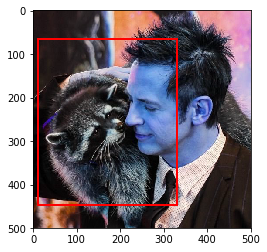

In [36]:
x0 = int(region[0] * image_width / IMAGE_SIZE) # Scale the BBox
y0 = int(region[1] * image_height / IMAGE_SIZE)

x1 = int((region[2]) * image_width / IMAGE_SIZE)
y1 = int((region[3]) * image_height / IMAGE_SIZE)
# Create figure and axes
fig,ax = plt.subplots(1)

# Display the image
ax.imshow(unscaled)

# Create a Rectangle patch
rect = patches.Rectangle((x0, y0), (x1 - x0) , (y1 - y0) , linewidth=2, edgecolor='r', facecolor='none')

# Add the patch to the Axes
ax.add_patch(rect)

plt.show

# Time Series Prediction using LSTM

### Download Data
Link: https://datamarket.com/data/set/2324/daily-minimum-temperatures-in-melbourne-australia-1981-1990#!ds=2324&display=line

#### Description
Daily minimum temperatures in Melbourne, Australia, 1981-1990

Units: Degrees Celcius

#### Steps before loading
- Rename the column name with temprature values to "Temprature"
- In the last, there is one extra row in the data, remove it by opening the file and save it again.
- There are some values in Temprature column which have a "?" before them, they will give error, remove "?" before them and save the file
- If you don't want to do these steps, just load the data file given by Great Learning.

#### Mount google drive

In [ ]:
#NA

#### Change your present working directory

In [ ]:
##NA

### Load your data file

In [39]:
temperarure_df=pd.read_csv('temperatures.csv')

#### Plot data

         Date  Temperature
0  1981-01-01         20.7
1  1981-01-02         17.9
2  1981-01-03         18.8
3  1981-01-04         14.6
4  1981-01-05         15.8


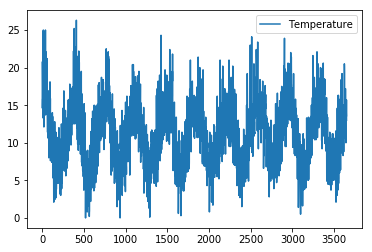

In [48]:
print(temperarure_df.head())
temperarure_df.plot()

#### Descibe your dataframe

In [43]:
temperarure_df.describe()

,Temperature
count,3650.000000
mean,11.177753
std,4.071837
min,0.000000
25%,8.300000
50%,11.000000
75%,14.000000
max,26.300000


#### Check for null values

In [45]:
## no null values 
temperarure_df.isnull().sum()

Date           0
Temperature    0
dtype: int64

#### Drop null values

In [ ]:
##NA 

#### Get the representation of the distribution of data in the form of histogram

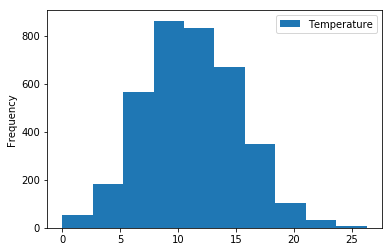

In [47]:
## Tihs 
temperarure_df.plot(kind='Hist')

#### Check the maximum and minimum values

In [51]:
print('Minimum temp is',temperarure_df.min())
print('Max temp is',temperarure_df.max())

Minimum temp is Date           1981-01-01
Temperature             0
dtype: object
Max temp is Date           1990-12-31
Temperature          26.3
dtype: object


### Normalize the data

In [53]:
temperarure_df['Temperature'] = temperarure_df['Temperature']/1000  ### Normalizing the data

#### Check the maximum and minimum values of scaled data

In [54]:
print('Minimum temp is',temperarure_df.min())
print('Max temp is',temperarure_df.max())

Minimum temp is Date           1981-01-01
Temperature             0
dtype: object
Max temp is Date           1990-12-31
Temperature        0.0263
dtype: object


#### Look into some of the scaled values

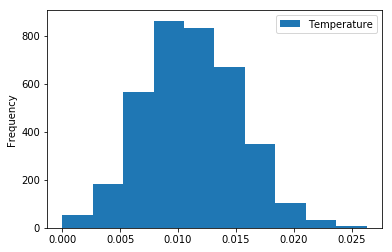

In [55]:
## This would give again a holistic view of the scaled values.
temperarure_df.plot(kind='Hist')

In [59]:
# Data Cleansing
columns_to_keep = ['Temperature']
temperarure_df = temperarure_df[columns_to_keep]
temperarure_df['Temperature'] = temperarure_df['Temperature'].apply(lambda x: x*1000)
temperarure_df.index.names = ['Month']
temperarure_df.sort_index(inplace=True)
print('Total rows: {}'.format(len(temperarure_df)))
temperarure_df.head()

Total rows: 3650


/Users/skirar/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,Temperature
Month,
0,20.7
1,17.9
2,18.8
3,14.6
4,15.8


In [60]:
dataset = temperarure_df.astype('float32')

In [62]:
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import GRU, Dense
from keras.layers import LSTM
from keras  import callbacks
from keras import optimizers
import pandas as pd 
import tensorflow as tf
import numpy as np

In [63]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(dataset)

### Split data into Training and Testing

In [64]:
#Create the model
train_size = int(len(scaled) * 0.70)
test_size = len(scaled - train_size)
train, test = scaled[0:train_size, :], scaled[train_size: len(scaled), :]

train: 2555
test: 1095


#### Print train and test size

In [65]:
print('train: {}\ntest: {}'.format(len(train), len(test)))

train: 2555
test: 1095


## Create the sequential data
Map the temprature at a particular time t to the temprature at time t+n, where n is any number you define.

For example: to map tempratures of consecutive days, use t+1, i.e. loop_back = 1

#### Define your function to create dataset

In [66]:
def create_dataset(dataset, look_back=1):
    print(len(dataset), look_back)
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        print(i)
        print('X {} to {}'.format(i, i+look_back))
        print(a)
        print('Y {}'.format(i + look_back))
        print(dataset[i + look_back, 0])
        dataset[i + look_back, 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

#### Use function to get training and test set

In [67]:
look_back = 1
X_train, y_train = create_dataset(train, look_back)
X_test, y_test = create_dataset(test, look_back)

2555 1
0
X 0 to 1
[0.7870723]
Y 1
0.6806083702582986
1
X 1 to 2
[0.68060837]
Y 2
0.7148288890658444
2
X 2 to 3
[0.71482889]
Y 3
0.5551331104563756
3
X 3 to 4
[0.55513311]
Y 4
0.6007604809535642
4
X 4 to 5
[0.60076048]
Y 5
0.6007604809535642
5
X 5 to 6
[0.60076048]
Y 6
0.6007604809535642
6
X 6 to 7
[0.60076048]
Y 7
0.6615969628626882
7
X 7 to 8
[0.66159696]
Y 8
0.8288973334395067
8
X 8 to 9
[0.82889733]
Y 9
0.7604562958244149
9
X 9 to 10
[0.7604563]
Y 10
0.6159696286268815
10
X 10 to 11
[0.61596963]
Y 11
0.5057034439755123
11
X 11 to 12
[0.50570344]
Y 12
0.6349810360224919
12
X 12 to 13
[0.63498104]
Y 13
0.817490518011246
13
X 13 to 14
[0.81749052]
Y 14
0.9505703697805186
14
X 14 to 15
[0.95057037]
Y 15
0.7870722951873749
15
X 15 to 16
[0.7870723]
Y 16
0.7832699992037001
16
X 16 to 17
[0.78327]
Y 17
0.9429657778131689
17
X 17 to 18
[0.94296578]
Y 18
0.6730038508137127
18
X 18 to 19
[0.67300385]
Y 19
0.5893536292639215
19
X 19 to 20
[0.58935363]
Y 20
0.6920152582093231
20
X 20 to 21
[0.6

Y 406
0.5855513332802467
406
X 406 to 407
[0.58555133]
Y 407
0.6463878514507526
407
X 407 to 408
[0.64638785]
Y 408
0.7300380730005438
408
X 408 to 409
[0.73003807]
Y 409
0.8669201482307274
409
X 409 to 410
[0.86692015]
Y 410
1.0
410
X 410 to 411
[1.]
Y 411
0.6920152582093231
411
X 411 to 412
[0.69201526]
Y 412
0.6463878514507526
412
X 412 to 413
[0.64638785]
Y 413
0.5627376661623434
413
X 413 to 414
[0.56273767]
Y 414
0.4866920365799019
414
X 414 to 415
[0.48669204]
Y 415
0.5893536292639215
415
X 415 to 416
[0.58935363]
Y 416
0.5931559252475964
416
X 416 to 417
[0.59315593]
Y 417
0.4980988882695445
417
X 417 to 418
[0.49809889]
Y 418
0.5779467775742789
418
X 418 to 419
[0.57794678]
Y 419
0.5361217030607652
419
X 419 to 420
[0.5361217]
Y 420
0.4752851848902593
420
X 420 to 421
[0.47528518]
Y 421
0.5551331104563756
421
X 421 to 422
[0.55513311]
Y 422
0.395437259324143
422
X 422 to 423
[0.39543726]
Y 423
0.5285171110934156
423
X 423 to 424
[0.52851711]
Y 424
0.4524714815109741
424
X 424 

[0.40304185]
Y 755
0.5931559252475964
755
X 755 to 756
[0.59315593]
Y 756
0.4068441110137856
756
X 756 to 757
[0.40684411]
Y 757
0.47908748087393416
757
X 757 to 758
[0.47908748]
Y 758
0.5247148513711226
758
X 758 to 759
[0.52471485]
Y 759
0.543726258766733
759
X 759 to 760
[0.54372626]
Y 760
0.5323194070770905
760
X 760 to 761
[0.53231941]
Y 761
0.6882129622256482
761
X 761 to 762
[0.68821296]
Y 762
0.6577946668790133
762
X 762 to 763
[0.65779467]
Y 763
0.49429659228586964
763
X 763 to 764
[0.49429659]
Y 764
0.6083650366595319
764
X 764 to 765
[0.60836504]
Y 765
0.5665399258846363
765
X 765 to 766
[0.56653993]
Y 766
0.6159696286268815
766
X 766 to 767
[0.61596963]
Y 767
0.7718631112526756
767
X 767 to 768
[0.77186311]
Y 768
0.8555133328024668
768
X 768 to 769
[0.85551333]
Y 769
0.6539924434181024
769
X 769 to 770
[0.65399244]
Y 770
0.604562740675857
770
X 770 to 771
[0.60456274]
Y 771
0.638783259483403
771
X 771 to 772
[0.63878326]
Y 772
0.5247148513711226
772
X 772 to 773
[0.52471485

X 1086 to 1087
[0.63498104]
Y 1087
0.5247148513711226
1087
X 1087 to 1088
[0.52471485]
Y 1088
0.665399258846363
1088
X 1088 to 1089
[0.66539926]
Y 1089
0.5703422218683112
1089
X 1089 to 1090
[0.57034222]
Y 1090
0.5285171110934156
1090
X 1090 to 1091
[0.52851711]
Y 1091
0.42205325868710303
1091
X 1091 to 1092
[0.42205326]
Y 1092
0.6121673326432068
1092
X 1092 to 1093
[0.61216733]
Y 1093
0.7756654072363504
1093
X 1093 to 1094
[0.77566541]
Y 1094
0.6844106662419733
1094
X 1094 to 1095
[0.68441067]
Y 1095
0.7414448884288045
1095
X 1095 to 1096
[0.74144489]
Y 1096
0.6501901474344275
1096
X 1096 to 1097
[0.65019015]
Y 1097
0.6501901474344275
1097
X 1097 to 1098
[0.65019015]
Y 1098
0.4562737774946489
1098
X 1098 to 1099
[0.45627378]
Y 1099
0.4182509627034282
1099
X 1099 to 1100
[0.41825096]
Y 1100
0.6197718520877926
1100
X 1100 to 1101
[0.61977185]
Y 1101
0.6121673326432068
1101
X 1101 to 1102
[0.61216733]
Y 1102
0.49429659228586964
1102
X 1102 to 1103
[0.49429659]
Y 1103
0.5095057036978052
1

X 1454 to 1455
[0.48669204]
Y 1455
0.46387833320061667
1455
X 1455 to 1456
[0.46387833]
Y 1456
0.4562737774946489
1456
X 1456 to 1457
[0.45627378]
Y 1457
0.47908748087393416
1457
X 1457 to 1458
[0.47908748]
Y 1458
0.6083650366595319
1458
X 1458 to 1459
[0.60836504]
Y 1459
0.6235741480714674
1459
X 1459 to 1460
[0.62357415]
Y 1460
0.5057034439755123
1460
X 1460 to 1461
[0.50570344]
Y 1461
0.5779467775742789
1461
X 1461 to 1462
[0.57794678]
Y 1462
0.4980988882695445
1462
X 1462 to 1463
[0.49809889]
Y 1463
0.4828897405962271
1463
X 1463 to 1464
[0.48288974]
Y 1464
0.5551331104563756
1464
X 1464 to 1465
[0.55513311]
Y 1465
0.4182509627034282
1465
X 1465 to 1466
[0.41825096]
Y 1466
0.5019011479918374
1466
X 1466 to 1467
[0.50190115]
Y 1467
0.46387833320061667
1467
X 1467 to 1468
[0.46387833]
Y 1468
0.547528518489026
1468
X 1468 to 1469
[0.54752852]
Y 1469
0.5209125553874479
1469
X 1469 to 1470
[0.52091256]
Y 1470
0.5513308144727008
1470
X 1470 to 1471
[0.55133081]
Y 1471
0.5361217030607652


X 1754 to 1755
[0.38022815]
Y 1755
0.4828897405962271
1755
X 1755 to 1756
[0.48288974]
Y 1756
0.38022814791220744
1756
X 1756 to 1757
[0.38022815]
Y 1757
0.3878327036181752
1757
X 1757 to 1758
[0.3878327]
Y 1758
0.24714829614293482
1758
X 1758 to 1759
[0.2471483]
Y 1759
0.34980988882695446
1759
X 1759 to 1760
[0.34980989]
Y 1760
0.4524714815109741
1760
X 1760 to 1761
[0.45247148]
Y 1761
0.5589353701786686
1761
X 1761 to 1762
[0.55893537]
Y 1762
0.4334600741153637
1762
X 1762 to 1763
[0.43346007]
Y 1763
0.25855514783257744
1763
X 1763 to 1764
[0.25855515]
Y 1764
0.2813688330811717
1764
X 1764 to 1765
[0.28136883]
Y 1765
0.42585551840939595
1765
X 1765 to 1766
[0.42585552]
Y 1766
0.34980988882695446
1766
X 1766 to 1767
[0.34980989]
Y 1767
0.47908748087393416
1767
X 1767 to 1768
[0.47908748]
Y 1768
0.6083650366595319
1768
X 1768 to 1769
[0.60836504]
Y 1769
0.6501901474344275
1769
X 1769 to 1770
[0.65019015]
Y 1770
0.5817490735579538
1770
X 1770 to 1771
[0.58174907]
Y 1771
0.50570344397551

2154
X 2154 to 2155
[0.55513311]
Y 2155
0.4410646660827134
2155
X 2155 to 2156
[0.44106467]
Y 2156
0.42585551840939595
2156
X 2156 to 2157
[0.42585552]
Y 2157
0.47908748087393416
2157
X 2157 to 2158
[0.47908748]
Y 2158
0.2851711109341556
2158
X 2158 to 2159
[0.28517111]
Y 2159
0.4182509627034282
2159
X 2159 to 2160
[0.41825096]
Y 2160
0.5513308144727008
2160
X 2160 to 2161
[0.55133081]
Y 2161
0.7034220736375838
2161
X 2161 to 2162
[0.70342207]
Y 2162
0.5855513332802467
2162
X 2162 to 2163
[0.58555133]
Y 2163
0.4980988882695445
2163
X 2163 to 2164
[0.49809889]
Y 2164
0.6197718520877926
2164
X 2164 to 2165
[0.61977185]
Y 2165
0.7680608877917645
2165
X 2165 to 2166
[0.76806089]
Y 2166
0.43726237009903857
2166
X 2166 to 2167
[0.43726237]
Y 2167
0.47148288890658446
2167
X 2167 to 2168
[0.47148289]
Y 2168
0.41444866671975333
2168
X 2168 to 2169
[0.41444867]
Y 2169
0.4828897405962271
2169
X 2169 to 2170
[0.48288974]
Y 2170
0.46387833320061667
2170
X 2170 to 2171
[0.46387833]
Y 2171
0.47148288

0.5057034439755123
1095 1
0
X 0 to 1
[0.58174907]
Y 1
0.543726258766733
1
X 1 to 2
[0.54372626]
Y 2
0.51330799968148
2
X 2 to 3
[0.513308]
Y 3
0.5703422218683112
3
X 3 to 4
[0.57034222]
Y 4
0.5171102956651549
4
X 4 to 5
[0.5171103]
Y 5
0.5779467775742789
5
X 5 to 6
[0.57794678]
Y 6
0.6463878514507526
6
X 6 to 7
[0.64638785]
Y 7
0.7110266656049334
7
X 7 to 8
[0.71102667]
Y 8
0.6273764440551423
8
X 8 to 9
[0.62737644]
Y 9
0.6615969628626882
9
X 9 to 10
[0.66159696]
Y 10
0.695817481670234
10
X 10 to 11
[0.69581748]
Y 11
0.695817481670234
11
X 11 to 12
[0.69581748]
Y 12
0.8517110368187919
12
X 12 to 13
[0.85171104]
Y 13
0.8136882220275712
13
X 13 to 14
[0.81368822]
Y 14
0.7946768146319608
14
X 14 to 15
[0.79467681]
Y 15
0.6692015548300378
15
X 15 to 16
[0.66920155]
Y 16
0.5893536292639215
16
X 16 to 17
[0.58935363]
Y 17
0.6311787400388171
17
X 17 to 18
[0.63117874]
Y 18
0.6159696286268815
18
X 18 to 19
[0.61596963]
Y 19
0.5931559252475964
19
X 19 to 20
[0.59315593]
Y 20
0.5513308144727008


[0.61596963]
Y 339
0.49429659228586964
339
X 339 to 340
[0.49429659]
Y 340
0.4752851848902593
340
X 340 to 341
[0.47528518]
Y 341
0.47148288890658446
341
X 341 to 342
[0.47148289]
Y 342
0.6121673326432068
342
X 342 to 343
[0.61216733]
Y 343
0.7680608877917645
343
X 343 to 344
[0.76806089]
Y 344
0.543726258766733
344
X 344 to 345
[0.54372626]
Y 345
0.4182509627034282
345
X 345 to 346
[0.41825096]
Y 346
0.547528518489026
346
X 346 to 347
[0.54752852]
Y 347
0.5969581849698893
347
X 347 to 348
[0.59695818]
Y 348
0.7490494803961542
348
X 348 to 349
[0.74904948]
Y 349
0.7870722951873749
349
X 349 to 350
[0.7870723]
Y 350
0.908745259005623
350
X 350 to 351
[0.90874526]
Y 351
0.6311787400388171
351
X 351 to 352
[0.63117874]
Y 352
0.665399258846363
352
X 352 to 353
[0.66539926]
Y 353
0.5665399258846363
353
X 353 to 354
[0.56653993]
Y 354
0.5171102956651549
354
X 354 to 355
[0.5171103]
Y 355
0.4524714815109741
355
X 355 to 356
[0.45247148]
Y 356
0.5779467775742789
356
X 356 to 357
[0.57794678]
Y

[0.31558937]
Y 501
0.30798481431344077
501
X 501 to 502
[0.30798481]
Y 502
0.4448669258050063
502
X 502 to 503
[0.44486693]
Y 503
0.4410646660827134
503
X 503 to 504
[0.44106467]
Y 504
0.2813688330811717
504
X 504 to 505
[0.28136883]
Y 505
0.1977186296620715
505
X 505 to 506
[0.19771863]
Y 506
0.4182509627034282
506
X 506 to 507
[0.41825096]
Y 507
0.3612167405165971
507
X 507 to 508
[0.36121674]
Y 508
0.34980988882695446
508
X 508 to 509
[0.34980989]
Y 509
0.4068441110137856
509
X 509 to 510
[0.40684411]
Y 510
0.34220533312098667
510
X 510 to 511
[0.34220533]
Y 511
0.3878327036181752
511
X 511 to 512
[0.3878327]
Y 512
0.39163499960185005
512
X 512 to 513
[0.391635]
Y 513
0.46007607347832374
513
X 513 to 514
[0.46007607]
Y 514
0.5019011479918374
514
X 514 to 515
[0.50190115]
Y 515
0.2509505739959187
515
X 515 to 516
[0.25095057]
Y 516
0.08745247220673862
516
X 516 to 517
[0.08745247]
Y 517
0.053231939801174494
517
X 517 to 518
[0.05323194]
Y 518
0.07984790743542537
518
X 518 to 519
[0.0

X 700 to 701
[0.69581748]
Y 701
0.5209125553874479
701
X 701 to 702
[0.52091256]
Y 702
0.5057034439755123
702
X 702 to 703
[0.50570344]
Y 703
0.40304185129149267
703
X 703 to 704
[0.40304185]
Y 704
0.5361217030607652
704
X 704 to 705
[0.5361217]
Y 705
0.6083650366595319
705
X 705 to 706
[0.60836504]
Y 706
0.6273764440551423
706
X 706 to 707
[0.62737644]
Y 707
0.5361217030607652
707
X 707 to 708
[0.5361217]
Y 708
0.7110266656049334
708
X 708 to 709
[0.71102667]
Y 709
0.6159696286268815
709
X 709 to 710
[0.61596963]
Y 710
0.5627376661623434
710
X 710 to 711
[0.56273767]
Y 711
0.47908748087393416
711
X 711 to 712
[0.47908748]
Y 712
0.395437259324143
712
X 712 to 713
[0.39543726]
Y 713
0.46387833320061667
713
X 713 to 714
[0.46387833]
Y 714
0.47908748087393416
714
X 714 to 715
[0.47908748]
Y 715
0.46007607347832374
715
X 715 to 716
[0.46007607]
Y 716
0.6577946668790133
716
X 716 to 717
[0.65779467]
Y 717
0.6235741480714674
717
X 717 to 718
[0.62357415]
Y 718
0.47908748087393416
718
X 718 t

Y 942
0.25855514783257744
942
X 942 to 943
[0.25855515]
Y 943
0.3726235922062397
943
X 943 to 944
[0.37262359]
Y 944
0.21673003705768185
944
X 944 to 945
[0.21673004]
Y 945
0.3269962217090512
945
X 945 to 946
[0.32699622]
Y 946
0.40304185129149267
946
X 946 to 947
[0.40304185]
Y 947
0.2965779626237982
947
X 947 to 948
[0.29657796]
Y 948
0.29277566664012333
948
X 948 to 949
[0.29277567]
Y 949
0.3269962217090512
949
X 949 to 950
[0.32699622]
Y 950
0.24714829614293482
950
X 950 to 951
[0.2471483]
Y 951
0.2623574256855613
951
X 951 to 952
[0.26235743]
Y 952
0.24334601828995095
952
X 952 to 953
[0.24334602]
Y 953
0.3231939257253763
953
X 953 to 954
[0.32319393]
Y 954
0.2965779626237982
954
X 954 to 955
[0.29657796]
Y 955
0.3536121848106293
955
X 955 to 956
[0.35361218]
Y 956
0.3193916297417015
956
X 956 to 957
[0.31939163]
Y 957
0.2965779626237982
957
X 957 to 958
[0.29657796]
Y 958
0.2813688330811717
958
X 958 to 959
[0.28136883]
Y 959
0.29277566664012333
959
X 959 to 960
[0.29277567]
Y 96

#### Transform the prepared train and test input data into the expected structure using numpy.reshape()

In [68]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)
print(X_test.shape)

(2553, 1, 1)
(1093, 1, 1)


## Define Model

### Define sequntial model, add LSTM layer and compile the model

In [70]:
#The network has a visible layer with 1 input, a hidden layer with 4 LSTM blocks or neurons, and an output layer that makes a single value prediction. The default sigmoid activation function is used for the LSTM blocks. The network is trained for 100 epochs and a batch size of 1 is used.
#create and fit the LSTM network
batch_size = 1
model = Sequential()
model.add(LSTM(4, batch_input_shape=(batch_size, look_back, 1), stateful=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=10, batch_size=batch_size, verbose=2, shuffle=True)

Epoch 1/10
 - 18s - loss: 0.0250
Epoch 2/10
 - 13s - loss: 0.0159
Epoch 3/10
 - 12s - loss: 0.0130
Epoch 4/10
 - 12s - loss: 0.0115
Epoch 5/10
 - 13s - loss: 0.0109
Epoch 6/10
 - 14s - loss: 0.0107
Epoch 7/10
 - 13s - loss: 0.0103
Epoch 8/10
 - 17s - loss: 0.0103
Epoch 9/10
 - 16s - loss: 0.0103
Epoch 10/10
 - 18s - loss: 0.0103


### Summarize your model

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=batch_size, verbose=2, shuffle=True)

### Train the model

In [71]:
import math
from sklearn.metrics import mean_squared_error

trainPredict = model.predict(X_train, batch_size=batch_size)
model.reset_states()

testPredict = model.predict(X_test, batch_size=batch_size)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
y_train = scaler.inverse_transform([y_train])
testPredict = scaler.inverse_transform(testPredict)
y_test = scaler.inverse_transform([y_test])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(y_test[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 2.63 RMSE
Test Score: 2.48 RMSE


## Make Predictions and Evaluate your model

In [ ]:
## Done above 

## Plot the results

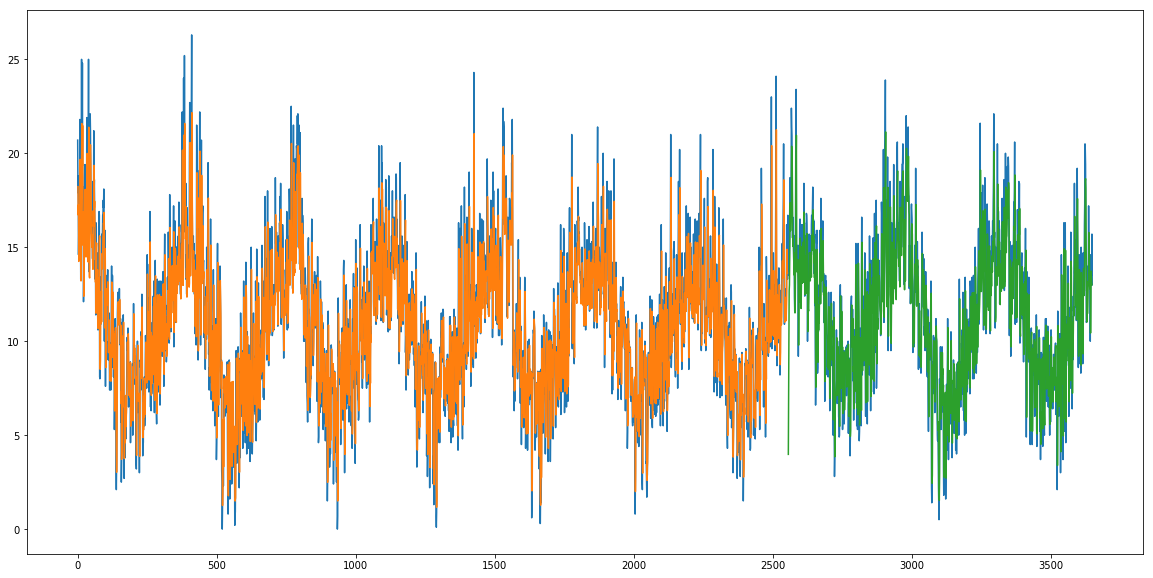

In [72]:
trainPredictPlot = np.empty_like(scaled)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(scaled)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(scaled)-1, :] = testPredict
# plot baseline and predictions
plt.figure(figsize=(20,10))
plt.plot(scaler.inverse_transform(scaled))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()